# Analyzing the results of regular Logistic Regression CV against the XOR-pathway upsampling strategy

## I. Unpack results.

In [1]:
%pylab inline
import pickle
import numpy as np
import pandas as pd
import networkx as nx
from matplotlib_venn import venn3, venn3_circles, venn2

results = pickle.load(open('xor_logit_results.pickle', 'rb'))

Populating the interactive namespace from numpy and matplotlib


In [2]:
results

[('hsa00010',
  'hsa00760',
  [0.4, 0.35, 0.5, 0.5, 0.55, 0.45, 0.5, 0.6, 0.45, 0.55],
  ['SMPD1',
   'TMEM67',
   'PMS1',
   'CD81',
   'PRAF2',
   'TP53',
   'MGMT',
   'UCHL1',
   'SMYD3',
   'DEPTOR',
   'SIGIRR',
   'ENSA',
   'BCAT1',
   'DSC3',
   'MED27',
   'S100P',
   'TTF2',
   'LTN1',
   'MAGEA1',
   'TCF3',
   'FAM208B',
   'CD4',
   'FCN1',
   'PLA2G2A',
   'HLA-DRA',
   'PTN',
   'COLEC12',
   'CMBL',
   'HDDC3',
   'TSPAN3',
   'TMEM87B',
   'CKB',
   'KRT9',
   'CPB2',
   'GGH',
   'SEC11C',
   'OCLN',
   'QPRT',
   'THAP4',
   'OLFM4',
   'LRRC46',
   'SLC2A1',
   'SARNP',
   'ECHS1',
   'SAT2',
   'KPTN',
   'TANC2',
   'TGIF1',
   'ADH1B',
   'FRAS1',
   'CBX4',
   'GZMK',
   'NSD3',
   'TGM1',
   'GLCE',
   'TAB3',
   'ALKBH7',
   'HIST1H2BD',
   'HADH',
   'SNCG',
   'SNCB',
   'SERPINA5',
   'PLAU',
   'CDK5RAP2',
   'CKM',
   'ARSE',
   'HAPLN1',
   'CASP2',
   'TTR',
   'IGFBP7',
   'C2CD2',
   'SSR3',
   'PLA2G4A',
   'CCDC18',
   'AZU1',
   'ALDH1A1',
   'MRP

In [6]:
scores = pd.DataFrame({result[0]+'_'+result[1]: result[2] for result in results})
scores

,hsa00010_hsa00760,hsa00053_hsa00500,hsa00061_hsa05216,hsa00062_hsa04392,hsa00100_hsa03022,hsa00120_hsa04530,hsa00130_hsa00280,hsa00140_hsa00564,hsa00190_hsa04213,hsa00220_hsa05200,...,hsa05219_hsa00920,hsa05221_hsa05160,hsa05224_hsa05213,hsa05230_hsa04650,hsa05231_hsa00650,hsa05321_hsa03460,hsa05323_hsa05340,hsa05332_hsa05142,hsa05414_hsa04215,hsa05416_hsa01523
0,0.40,0.45,0.30,0.55,0.45,0.45,0.30,0.35,0.50,0.60,...,0.30,0.45,0.35,0.50,0.55,0.40,0.45,0.45,0.40,0.55
1,0.35,0.60,0.60,0.55,0.55,0.45,0.50,0.60,0.65,0.50,...,0.35,0.45,0.35,0.60,0.35,0.60,0.55,0.60,0.45,0.60
2,0.50,0.40,0.65,0.35,0.55,0.50,0.65,0.50,0.60,0.40,...,0.50,0.50,0.50,0.55,0.60,0.60,0.40,0.40,0.55,0.35
3,0.50,0.40,0.55,0.50,0.55,0.60,0.55,0.40,0.60,0.55,...,0.50,0.60,0.50,0.55,0.60,0.40,0.40,0.40,0.55,0.45
4,0.55,0.45,0.55,0.65,0.45,0.50,0.55,0.50,0.55,0.60,...,0.55,0.55,0.55,0.60,0.65,0.60,0.45,0.45,0.55,0.40
5,0.45,0.50,0.50,0.55,0.55,0.55,0.50,0.45,0.30,0.60,...,0.45,0.55,0.45,0.35,0.55,0.60,0.50,0.50,0.55,0.35
6,0.50,0.65,0.40,0.55,0.60,0.55,0.45,0.65,0.40,0.55,...,0.50,0.55,0.50,0.40,0.35,0.40,0.65,0.65,0.60,0.40
7,0.60,0.45,0.45,0.50,0.70,0.70,0.40,0.35,0.60,0.50,...,0.60,0.65,0.60,0.50,0.45,0.55,0.45,0.45,0.65,0.55
8,0.45,0.45,0.45,0.55,0.30,0.50,0.45,0.45,0.25,0.50,...,0.45,0.50,0.45,0.25,0.45,0.50,0.45,0.45,0.55,0.45
9,0.55,0.65,0.55,0.45,0.65,0.35,0.55,0.65,0.40,0.45,...,0.55,0.40,0.55,0.35,0.30,0.50,0.65,0.65,0.40,0.45


## II. Analyze test-accuracy across folds (k = 10)

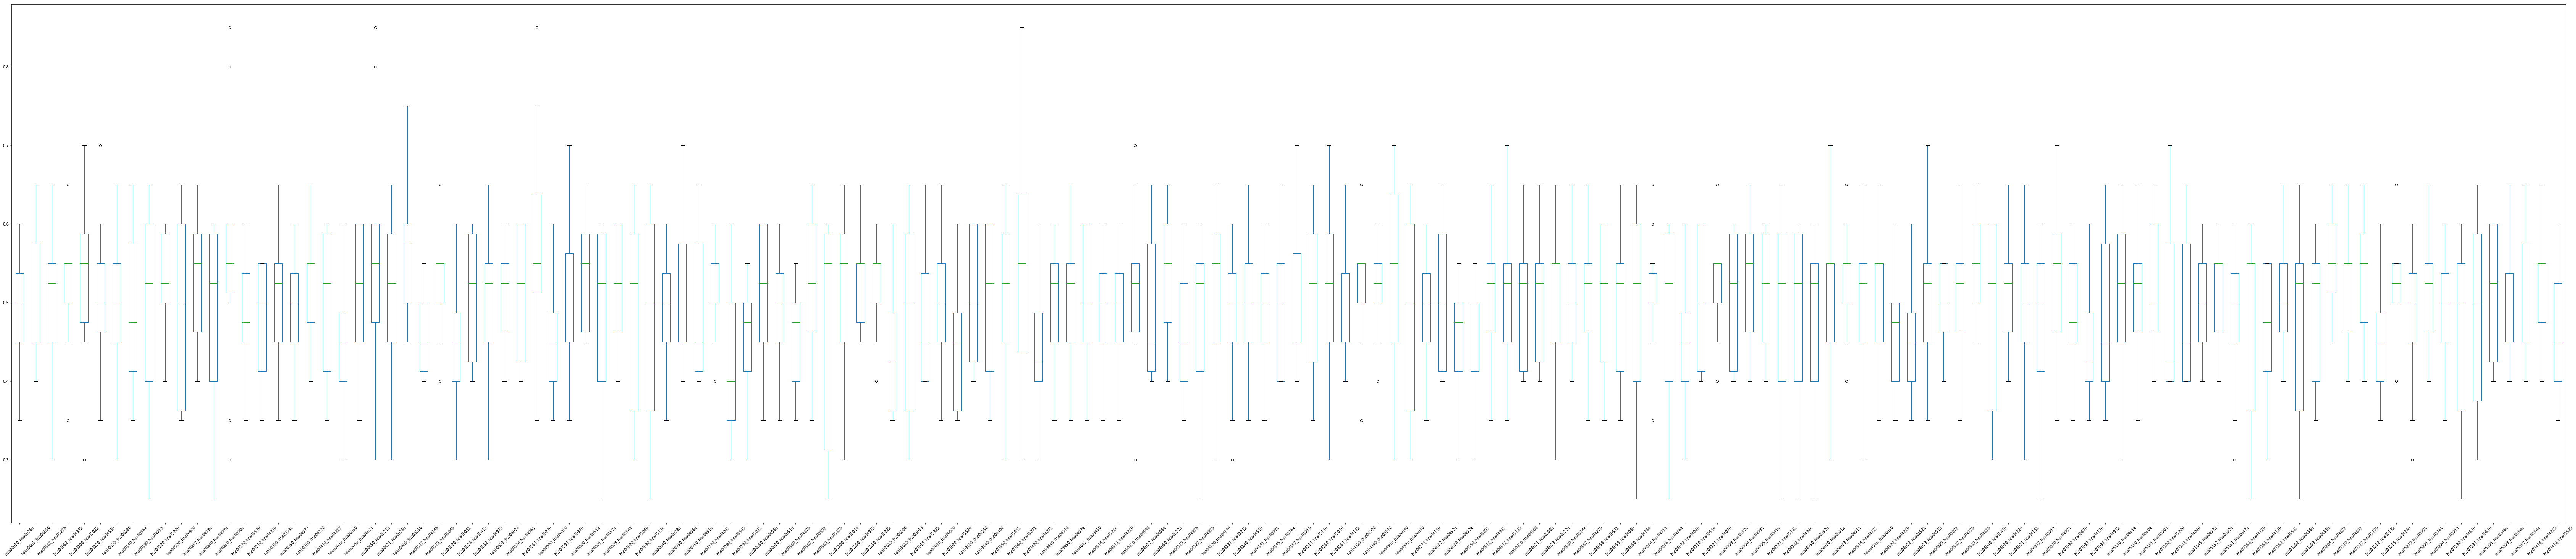

In [8]:
scores.plot.box(figsize=(120,25), rot=45).get_figure().savefig("/Users/alex/Desktop/xor_logit_results.png")

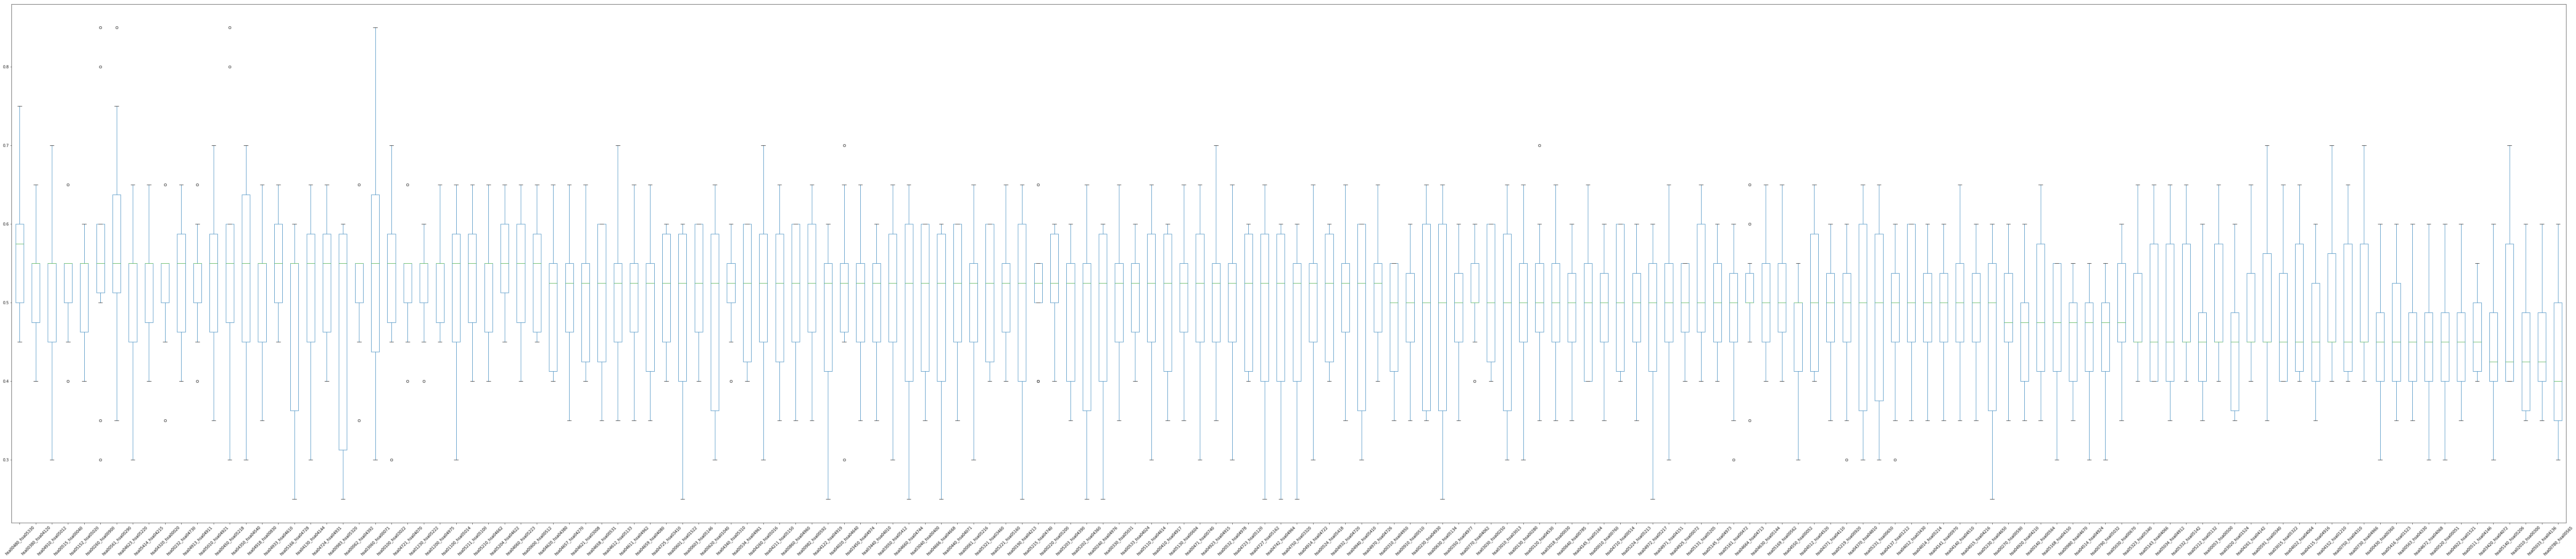

In [9]:
scores[scores.median().sort_values(ascending=False).index].plot.box(figsize=(120,25), rot=45).get_figure().savefig("/Users/alex/Desktop/xor_logit_results_sorted.png")

In [10]:
means = scores.mean()

In [11]:
np.mean(means.values)

0.49829113924050633

In [12]:
np.std(means.values)

0.027332760469895134

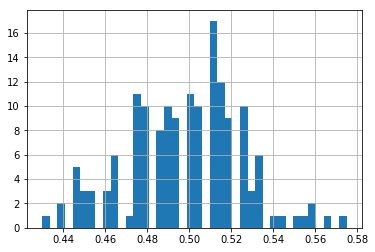

In [13]:
means.hist(bins=40)

## III. Analyze pathway recovery

In [16]:
pathways = pickle.load(open("../data_generation/KEGG_pathway_gene_lists.pkl", "rb"))

In [25]:
features = [((result[0], set(pathways[result[0]])), (result[1], set(pathways[result[1]])), ('predicted', set(result[3]))) for result in results]


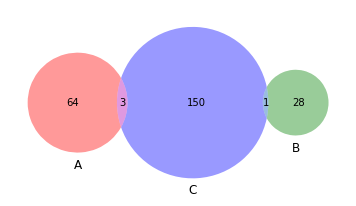

In [31]:
venn3([features[0][0][1], features[0][1][1], features[0][2][1]])

In [32]:
def recall(true1, true2, pred):    
    return len((true1 | true2) & pred) / float(len(true1 | true2))
    
def precision(true1, true2, pred): 
    return len((true1 | true2) & pred) / float(len(pred))


In [36]:
summary = {p1+'_'+p2: (recall(true1, true2, pred), precision(true1, true2, pred)) for (p1, true1), (p2, true2), (_, pred) in features if len(true1) > 0 and len(true2) > 0}
summary = pd.DataFrame(summary, index=['recall', 'precision'])
summary



,hsa00010_hsa00760,hsa00053_hsa00500,hsa00061_hsa05216,hsa00062_hsa04392,hsa00100_hsa03022,hsa00120_hsa04530,hsa00130_hsa00280,hsa00140_hsa00564,hsa00190_hsa04213,hsa00220_hsa05200,...,hsa05215_hsa04740,hsa05219_hsa00920,hsa05221_hsa05160,hsa05224_hsa05213,hsa05230_hsa04650,hsa05231_hsa00650,hsa05321_hsa03460,hsa05323_hsa05340,hsa05332_hsa05142,hsa05414_hsa04215
recall,0.041667,0.0,0.023810,0.0,0.030769,0.021390,0.033898,0.006536,0.0,0.004819,...,0.0,0.019608,0.025157,0.006452,0.010870,0.015748,0.016807,0.007937,0.007353,0.016260
precision,0.025974,0.0,0.005882,0.0,0.012739,0.026144,0.012739,0.006410,0.0,0.014815,...,0.0,0.007519,0.026144,0.006579,0.012821,0.012500,0.012579,0.006667,0.006667,0.013072


In [37]:
summary.mean(axis=1)

recall       0.017760
precision    0.015852
dtype: float64

In [38]:
summary.std(axis=1)

recall       0.015471
precision    0.013002
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113cf6d68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113a5a0f0>]], dtype=object)

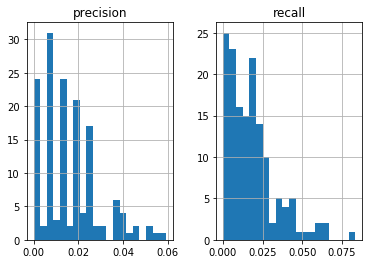

In [39]:
summary.transpose().hist(bins=20)